In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\hegde\Desktop\DS Ass Qst\Fraud_check.csv")

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA process

In [4]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [6]:
df.shape

(600, 6)

In [7]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Length: 600, dtype: bool

In [10]:
df[df.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [11]:
df[df.duplicated()].shape

(0, 6)

In [12]:
df.rename({'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income',
             'City.Population':'City_Population','Work.Experience':'Work_Experience'}, axis = 1, inplace = True)

In [13]:
df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [14]:
def split(num):
    if num <= 30000:
        return "Risky"
    else:
        return "Good"
df.Taxable_Income = df.Taxable_Income.apply(split)

C:\Users\hegde\AppData\Local\Temp\ipykernel_21124\959258083.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)


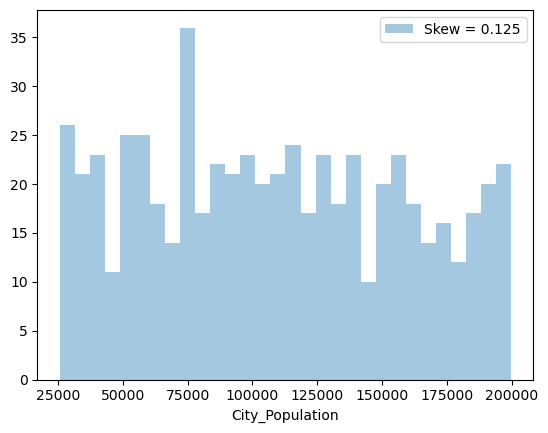

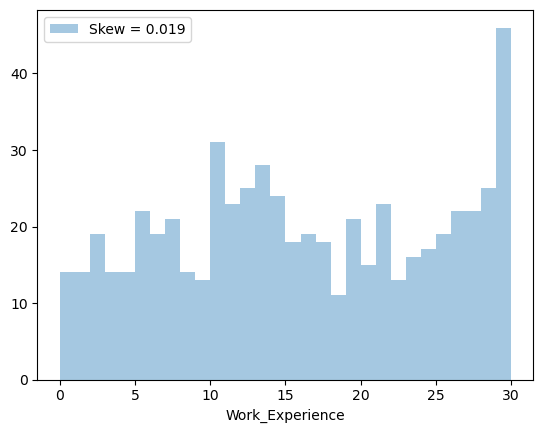

In [15]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [16]:
df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


# outlier detection

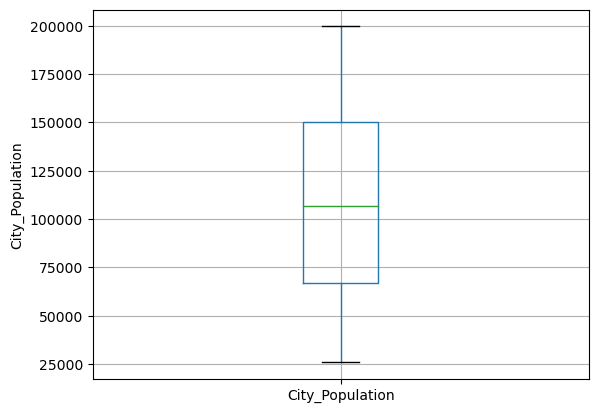

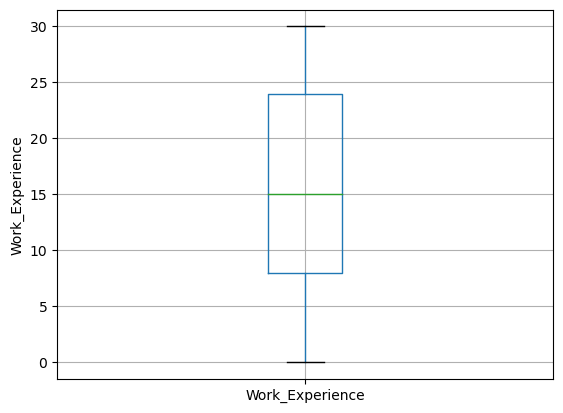

In [17]:
df_num = df.iloc[:,[3,4]]
for feature in df_num:
    df_num = df_num.copy()
    df_num.boxplot(column = feature)
    plt.ylabel(feature)
    plt.show()

In [18]:
# label encoder
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
df.Undergrad = l.fit_transform(df.Undergrad)
df.Marital_Status = l.fit_transform(df.Marital_Status)
df.Urban = l.fit_transform(df.Urban)
df.Taxable_Income = l.fit_transform(df.Taxable_Income)

In [19]:
df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


# Data visualization

<Figure size 800x800 with 0 Axes>

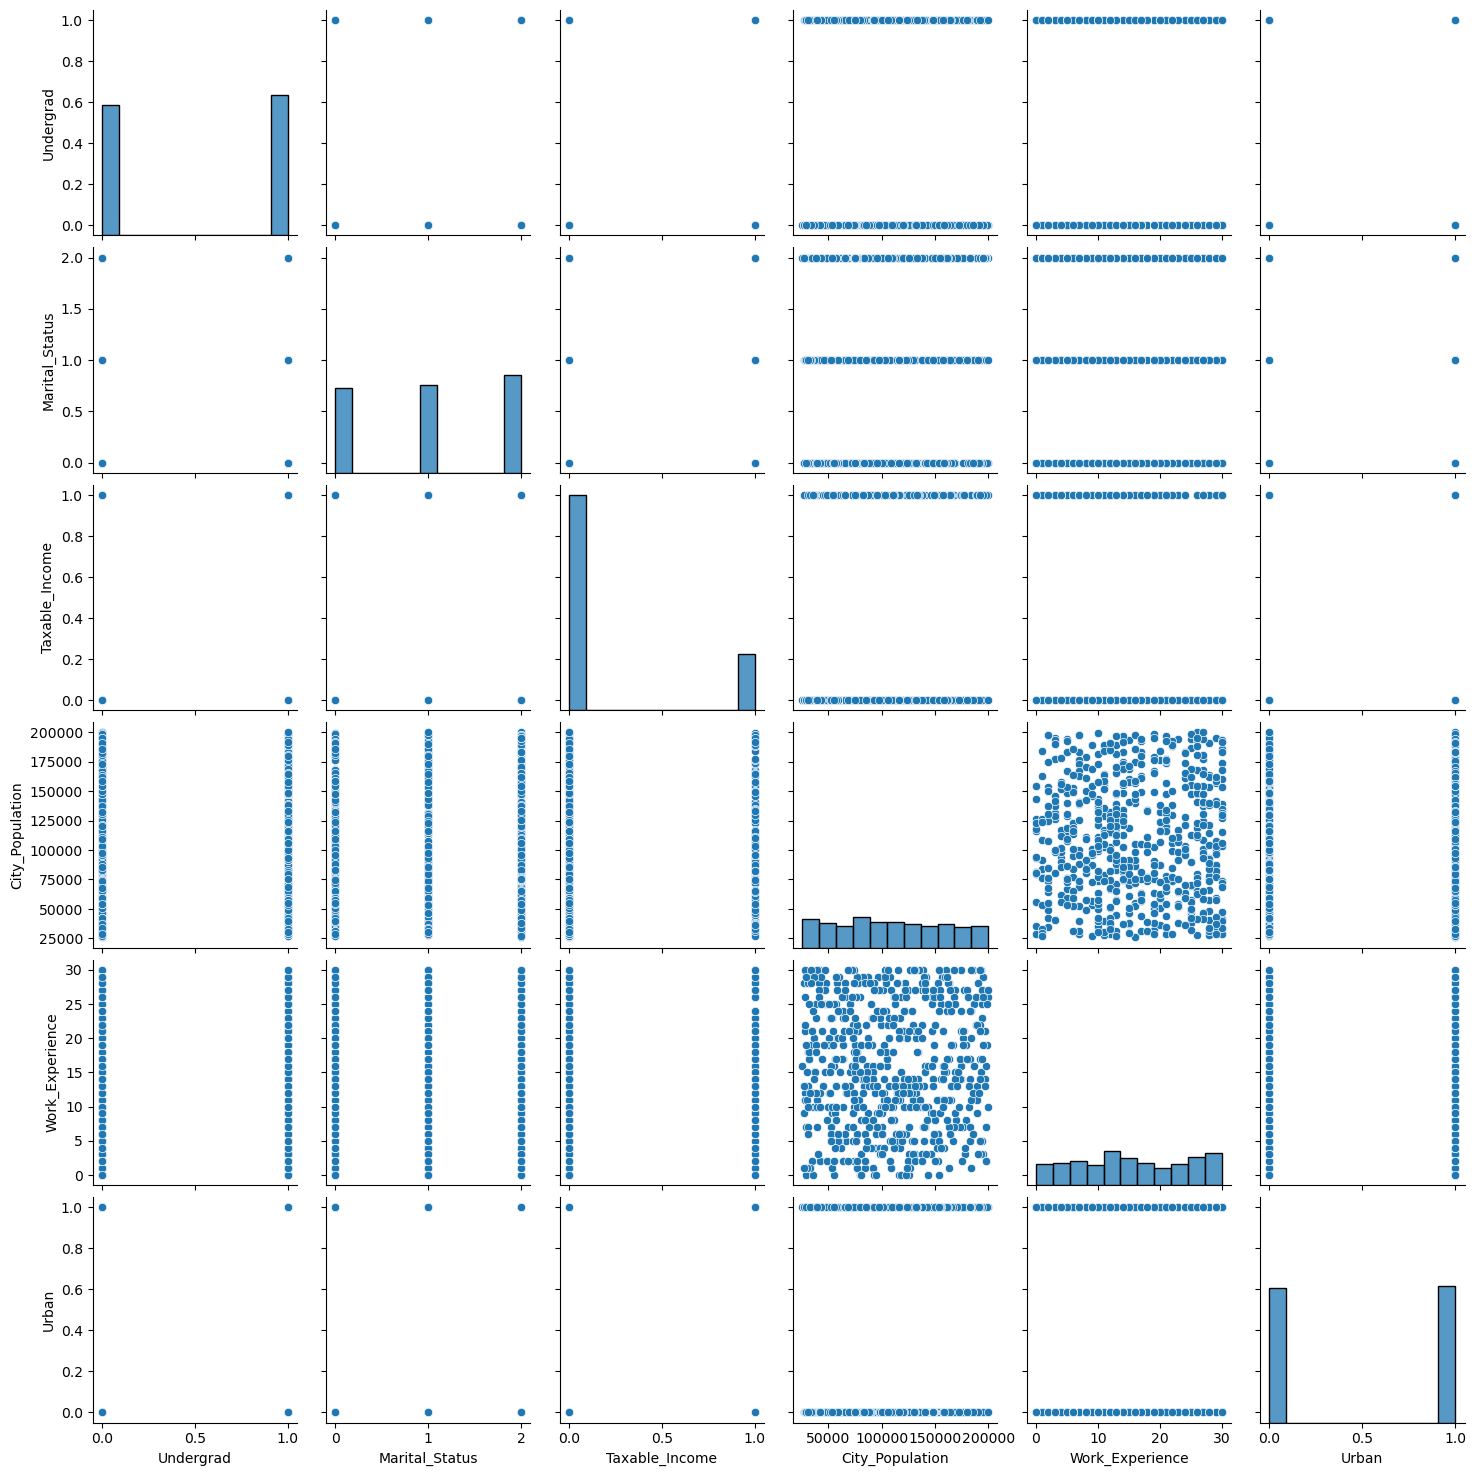

In [20]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='coolwarm')
plt.show()

<Axes: >

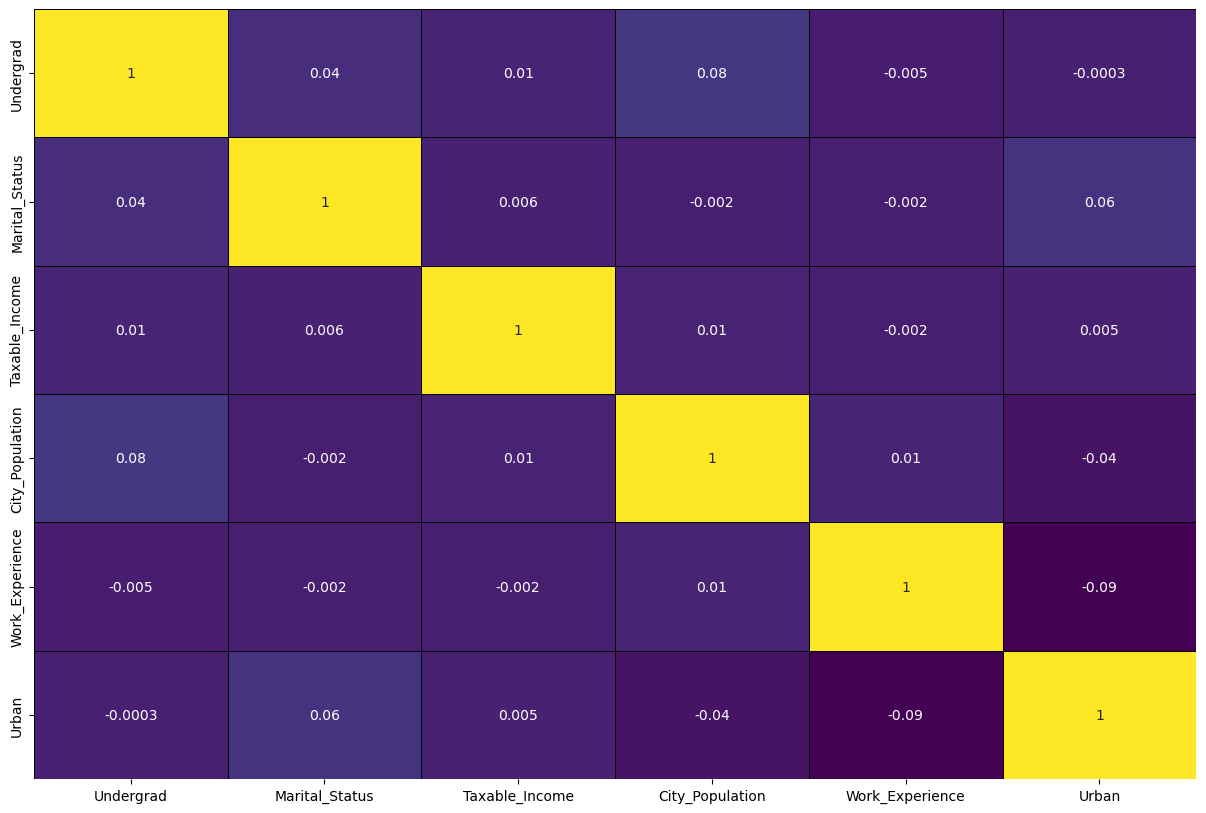

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

In [22]:
X = pd.concat([df.iloc[:,[0,1]],df.iloc[:,3:]], axis = 'columns')
y =  df.Taxable_Income

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [24]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

model = RandomForestClassifier(n_estimators=100, max_features=3)
model.fit(X_train, y_train)

RandomForestClassifier(max_features=3)

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.7277777777777777

# model validation using KFold

In [27]:
X = pd.concat([df.iloc[:,[0,1]],df.iloc[:,3:]], axis = 'columns')
y =  df.Taxable_Income

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [29]:
kfold = KFold(n_splits=10, random_state = 0, shuffle=True)
model1 = RandomForestClassifier(n_estimators=100, max_depth=3)
clf = DecisionTreeClassifier()
result = cross_val_score(model1, X, y, cv = kfold)
print(result.mean())

0.7933333333333332


# model validation using loocv

In [30]:
X = pd.concat([df.iloc[:,[0,1]],df.iloc[:,3:]], axis = 'columns')
y =  df.Taxable_Income

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut

In [32]:
loocv = LeaveOneOut()
model2 = RandomForestClassifier(n_estimators=100, max_depth=3)
clf = DecisionTreeClassifier()
result1 = cross_val_score(model2, X, y, cv = loocv)
print(result1.mean())

0.7933333333333333
